# Excercise 1 Task 3
## Cross Validation and Grid Search

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [3]:
dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,-1]
validation_size = 0.20
seed = 7
# Usage of new sklearn method train_test_split instead of cross validation
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [5]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [6]:
# GridSearchCV with SVC
parameters = {'kernel': ('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10]}
svc = SVC()
#gscv = GridSearchCV(estimator=SVC(), param_grid=parameters, cv=10, scoring=scoring)

In [7]:
# GridSearchCV Performance depending on number of Jobs
jobs = 8
timeit_results = []
for _ in range(jobs):
    gscvSVC = GridSearchCV(estimator=SVC(), param_grid=parameters, cv=10, n_jobs=(_+1), scoring=scoring)
    tr = %timeit -o gscvSVC.fit(X_train, Y_train)
    timeit_results.append(tr)

# best_times are extracted
best_times = [timer.best for timer in timeit_results]

1 loop, best of 3: 233 ms per loop
1 loop, best of 3: 241 ms per loop
1 loop, best of 3: 241 ms per loop
1 loop, best of 3: 270 ms per loop
1 loop, best of 3: 249 ms per loop
1 loop, best of 3: 276 ms per loop
1 loop, best of 3: 284 ms per loop
1 loop, best of 3: 271 ms per loop


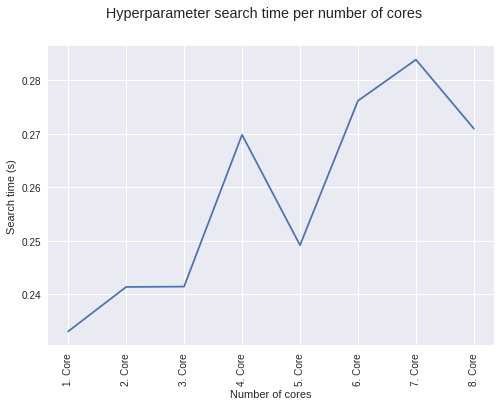

In [9]:
x = np.arange(1,9)
labels = ['%i. Core' % i for i in x]
fig = plt.figure()
fig.suptitle('Hyperparameter search time per number of cores')
ax = fig.add_subplot(111)
ax.set_xlabel('Number of cores')
ax.set_ylabel('Search time (s)')
ax.plot(x, best_times)
plt.xticks(x, labels, rotation='vertical')
plt.show()

Search time is constantly increasing due to two main factors
- Copying small datasets between different processing environments
- managing overhead due to multiprocessing and context copying

In [14]:
gscvSVC.cv_results_

{'mean_fit_time': array([ 0.00085075,  0.0005408 ,  0.00029414,  0.00041034,  0.0003078 ,
         0.00040159,  0.00031867,  0.00038898,  0.00030789,  0.00050595,
         0.00029922,  0.0003634 ,  0.00037923,  0.00037112,  0.0003083 ,
         0.00036526,  0.00030842,  0.00045276,  0.00034547,  0.00036571]),
 'mean_score_time': array([ 0.00028358,  0.00020416,  0.00014083,  0.00017531,  0.00016296,
         0.00017242,  0.0001646 ,  0.00017774,  0.00015273,  0.00020213,
         0.00015152,  0.00015068,  0.0001652 ,  0.00015671,  0.00016   ,
         0.00016108,  0.00014565,  0.00017555,  0.00016646,  0.00015287]),
 'mean_test_score': array([ 0.99166667,  0.99166667,  0.99166667,  0.99166667,  0.99166667,
         0.99166667,  0.98333333,  0.99166667,  0.975     ,  0.99166667,
         0.975     ,  0.99166667,  0.975     ,  0.99166667,  0.98333333,
         0.99166667,  0.98333333,  0.98333333,  0.98333333,  0.975     ]),
 'mean_train_score': array([ 0.99073146,  0.99166604,  0.990731